Загрузка данных и знакомство с ними


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

In [7]:

df=pd.read_csv('/home/mainuser/iis/data/car_data.csv')
df.head()
print("razmer dannih:",df.shape)
print("\n Tip daanih")
print(df.dtypes)
print("\n propushennie znahenia")

razmer dannih: (301, 9)

 Tip daanih
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

 propushennie znahenia


In [8]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


Статистики числовых признаков

In [10]:
print(df.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [27]:
print("\nПроверка пропущенных значений:")
print(df.isnull().sum())


Проверка пропущенных значений:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [28]:
# Анализ категориальных признаков
print("\n=== АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ ===")
categorical_features = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
for col in categorical_features:
    print(f"\n{col}: {df[col].nunique()} уникальных значений")
    print(df[col].value_counts().head())


=== АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ ===

Car_Name: 98 уникальных значений
Car_Name
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
Name: count, dtype: int64

Fuel_Type: 3 уникальных значений
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

Selling_type: 2 уникальных значений
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

Transmission: 2 уникальных значений
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [29]:
# Определение типов признаков
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"Числовые признаки: {numeric_features}")
print(f"Категориальные признаки: {categorical_features}")
print(f"Целевая переменная: Selling_Price")

Числовые признаки: ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
Категориальные признаки: ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
Целевая переменная: Selling_Price


In [ ]:
2.Очистка данных

In [30]:
print("=== ОЧИСТКА ДАННЫХ ===")
print(f"Исходный размер датасета: {len(df)}")

# Проверка и удаление дубликатов
duplicates = df.duplicated().sum()
print(f"Найдено дубликатов: {duplicates}")
df = df.drop_duplicates()
print(f"Размер после удаления дубликатов: {len(df)}")

# Проверка аномальных значений
print("\nПроверка аномальных значений:")
print("Минимальная цена:", df['Selling_Price'].min())
print("Максимальная цена:", df['Selling_Price'].max())
print("Минимальный пробег:", df['Driven_kms'].min())
print("Максимальный пробег:", df['Driven_kms'].max())

=== ОЧИСТКА ДАННЫХ ===
Исходный размер датасета: 301
Найдено дубликатов: 2
Размер после удаления дубликатов: 299

Проверка аномальных значений:
Минимальная цена: 0.1
Максимальная цена: 35.0
Минимальный пробег: 500
Максимальный пробег: 500000


In [31]:
# Фильтрация данных
df_clean = df[
    (df['Selling_Price'] > 0) & 
    (df['Present_Price'] > 0) &
    (df['Driven_kms'] >= 0) &
    (df['Year'] >= 1990) &
    (df['Owner'].between(0, 3))
].copy()

print(f"Размер после очистки: {len(df_clean)}")
print(f"Удалено записей: {len(df) - len(df_clean)}")

Размер после очистки: 299
Удалено записей: 0


3. Анализ признаков для модели

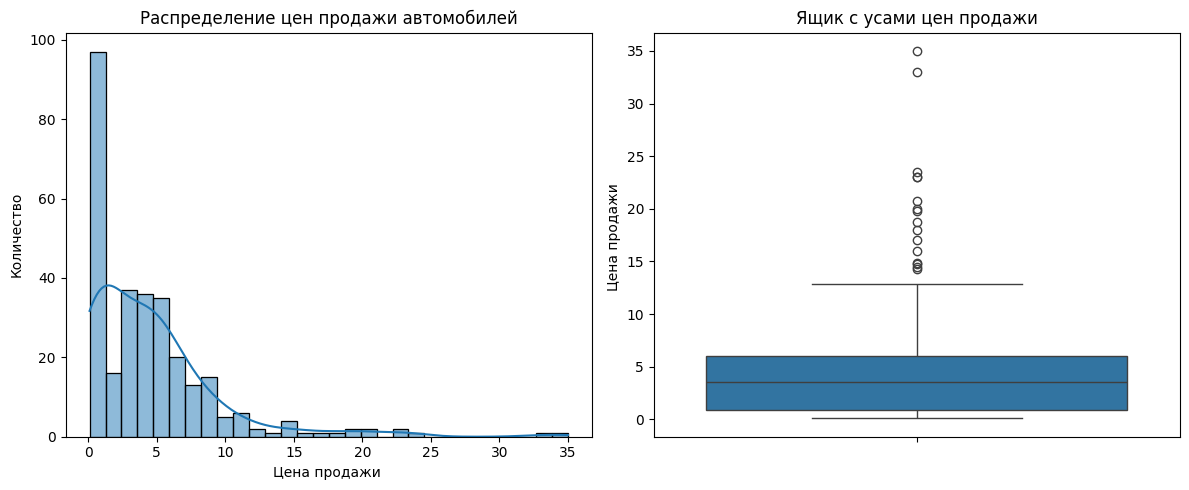

In [41]:
# График 1: Распределение целевой переменной
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['Selling_Price'], bins=30, kde=True)
plt.title('Распределение цен продажи автомобилей')
plt.xlabel('Цена продажи ')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_clean['Selling_Price'])
plt.title('Ящик с усами цен продажи')
plt.ylabel('Цена продажи ')

plt.tight_layout()
plt.savefig('/home/mainuser/iis/eda/price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Вывод по графику 1: Распределение цен продажи имеет правостороннюю асимметрию. Большинство автомобилей продаются в диапазоне 2-10 , при этом присутствуют выбросы - автомобили премиум-сегмента с ценами выше 15. Медианная цена составляет около 5-6.x

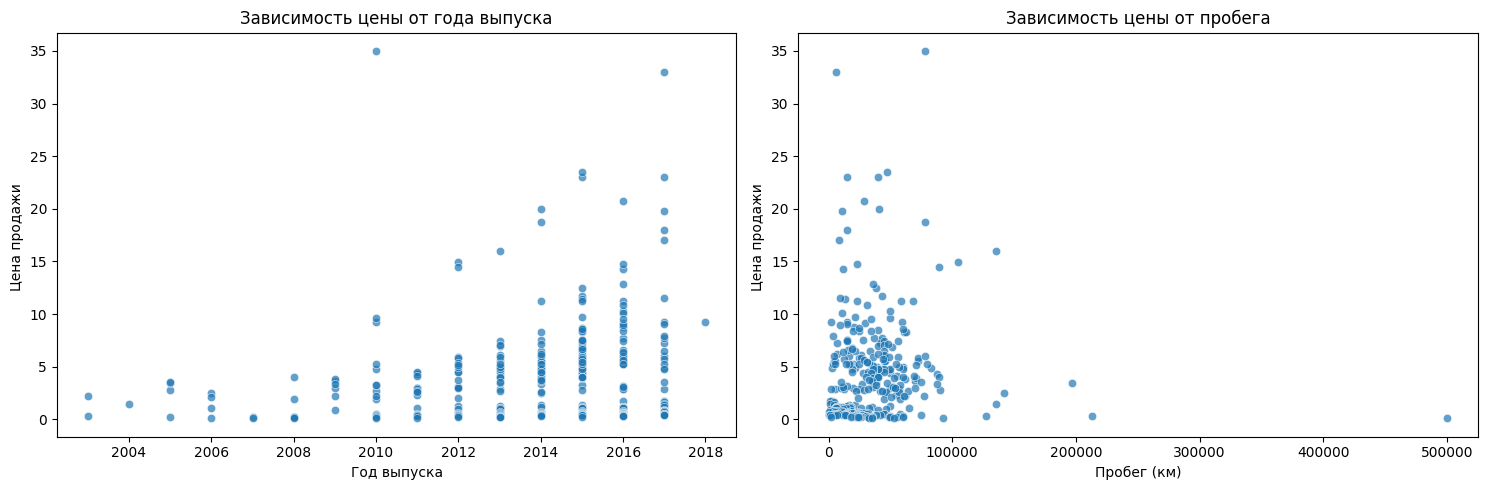

In [42]:
# График 2: Влияние года выпуска и пробега на цену
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_clean, x='Year', y='Selling_Price', alpha=0.7)
plt.title('Зависимость цены от года выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Цена продажи ')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_clean, x='Driven_kms', y='Selling_Price', alpha=0.7)
plt.title('Зависимость цены от пробега')
plt.xlabel('Пробег (км)')
plt.ylabel('Цена продажи ')

plt.tight_layout()
plt.savefig('/home/mainuser/iis/eda/price_vs_year_mileage.png', dpi=300, bbox_inches='tight')
plt.show()

Вывод по графику 2: Наблюдается сильная положительная корреляция между годом выпуска и ценой - более новые автомобили стоят дороже. Отрицательная корреляция с пробегом - автомобили с большим пробегом дешевеют. При этом зависимость нелинейная.

График 3: Влияние типа топлива и трансмиссии на цену

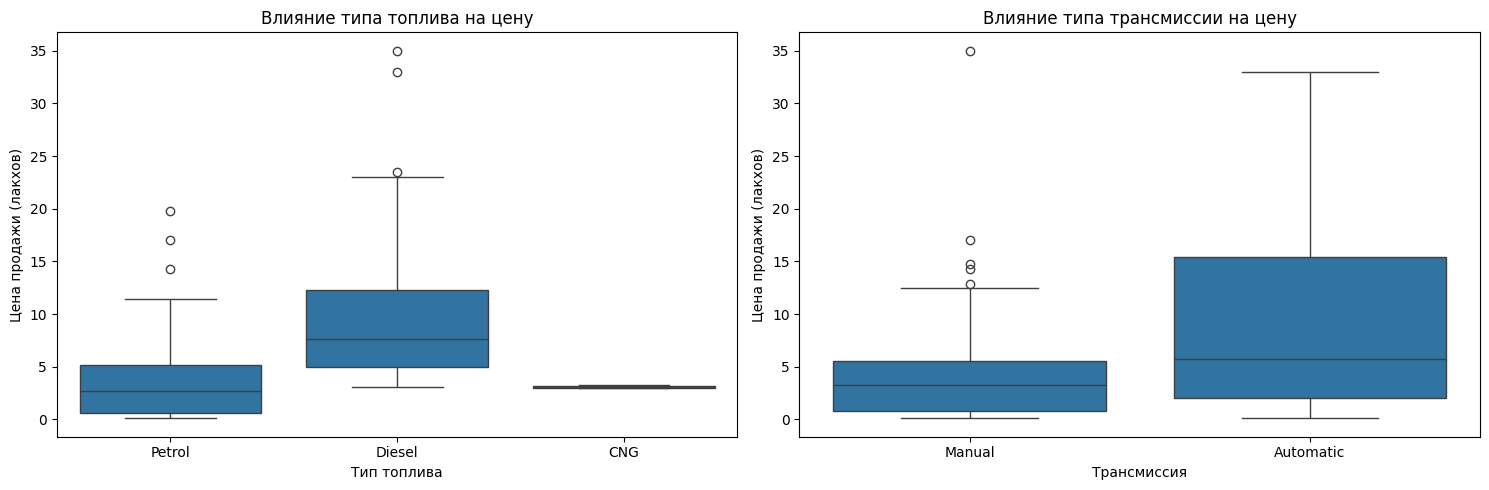

In [43]:
# График 3: Влияние категориальных признаков
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_clean, x='Fuel_Type', y='Selling_Price')
plt.title('Влияние типа топлива на цену')
plt.xlabel('Тип топлива')
plt.ylabel('Цена продажи (лакхов)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, x='Transmission', y='Selling_Price')
plt.title('Влияние типа трансмиссии на цену')
plt.xlabel('Трансмиссия')
plt.ylabel('Цена продажи (лакхов)')

plt.tight_layout()
plt.savefig('/home/mainuser/iis/eda/price_by_fuel_transmission.png', dpi=300, bbox_inches='tight')
plt.show()

Вывод по графику 3: Дизельные автомобили в среднем дороже бензиновых, а автомобили с автоматической трансмиссией значительно дороже механических. Тип топлива CNG ассоциируется с самыми низкими ценами.

График 4: Матрица корреляций

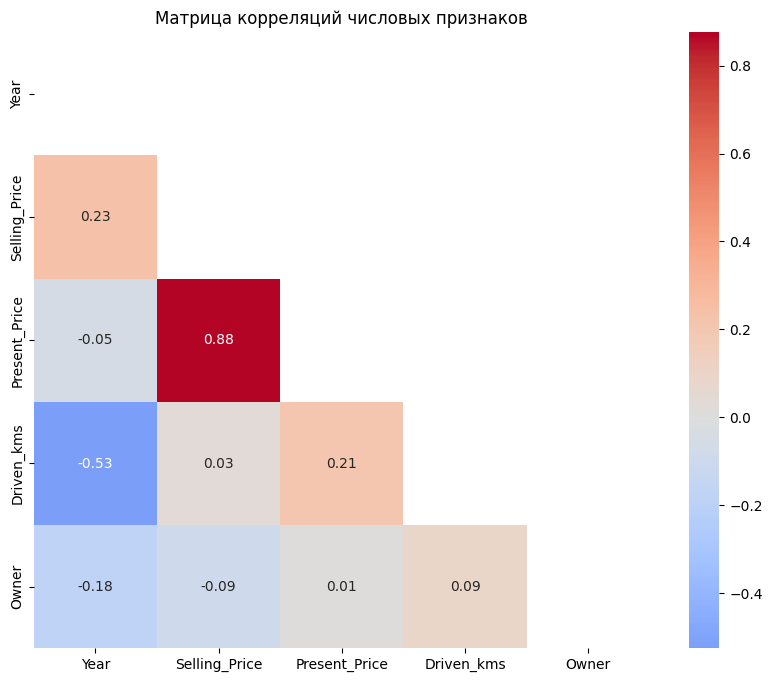

In [44]:
# График 4: Матрица корреляций
plt.figure(figsize=(10, 8))
numeric_cols = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
correlation_matrix = df_clean[numeric_cols].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True)
plt.title('Матрица корреляций числовых признаков')
plt.savefig('/home/mainuser/iis/eda/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

Вывод по графику 4: Наблюдается сильная положительная корреляция между текущей ценой и ценой продажи (0.88).

График 5: Интерактивный scatter plot 

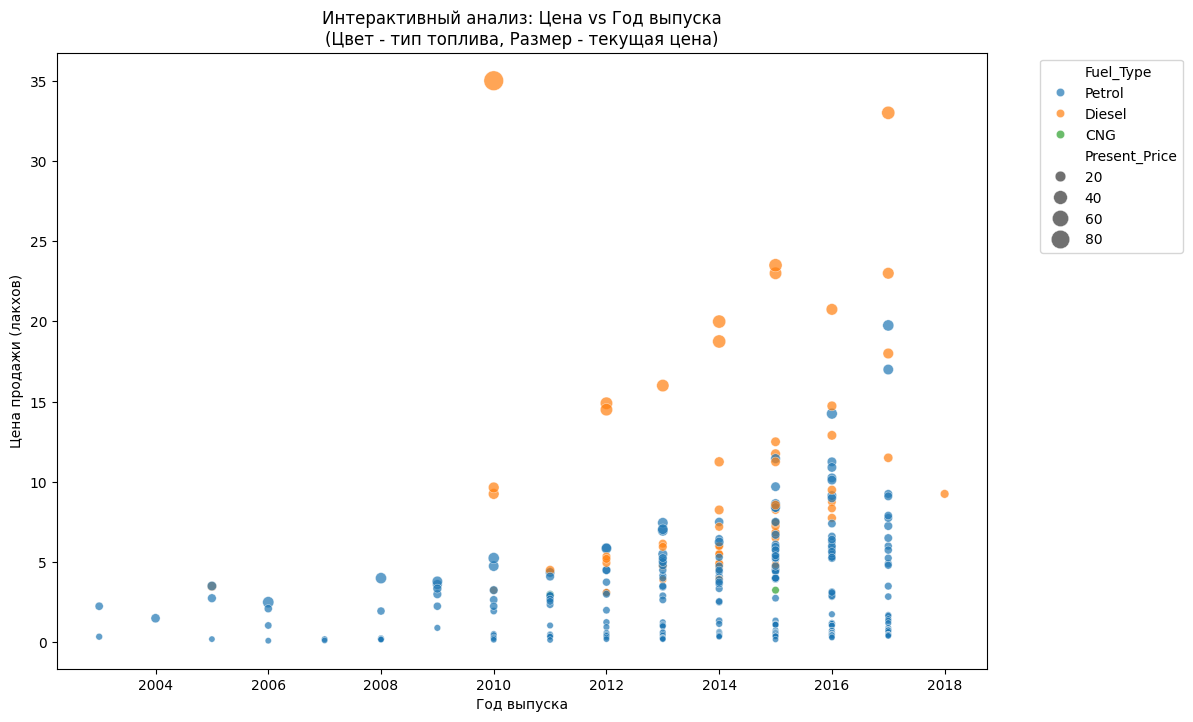

In [45]:
# График 5: Интерактивный анализ (используем hue и size для эмуляции интерактивности)
plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    data=df_clean, 
    x='Year', 
    y='Selling_Price', 
    hue='Fuel_Type', 
    size='Present_Price',
    sizes=(20, 200),
    alpha=0.7
)
plt.title('Интерактивный анализ: Цена vs Год выпуска\n(Цвет - тип топлива, Размер - текущая цена)')
plt.xlabel('Год выпуска')
plt.ylabel('Цена продажи (лакхов)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('/home/mainuser/iis/eda/interactive_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

Вывод по графику 5: Интерактивный анализ подтверждает комплексное влияние факторов: новые дизельные автомобили с высокими текущими ценами образуют кластер самых дорогих предложений. Бензиновые автомобили распределены более равномерно по ценовым сегментам.

4. Создание новых признаков

In [47]:
# Создание новых признаков на основе выявленных закономерностей
print("=== СОЗДАНИЕ НОВЫХ ПРИЗНАКОВ ===")

# Возраст автомобиля
current_year = 2024
df_clean['Car_Age'] = current_year - df_clean['Year']
print(f"Создан признак 'Car_Age'")

# Логарифм цены для нормализации распределения
df_clean['Log_Selling_Price'] = np.log1p(df_clean['Selling_Price'])
print(f"Создан признак 'Log_Selling_Price'")

# Категория пробега
def mileage_category(km):
    if km < 20000: return 'Low'
    elif km < 50000: return 'Medium'
    elif km < 100000: return 'High'
    else: return 'Very High'

df_clean['Mileage_Category'] = df_clean['Driven_kms'].apply(mileage_category)
print(f"Создан признак 'Mileage_Category'")

# Признак является ли автомобиль премиальным
premium_brands = ['fortuner', 'innova', 'corolla altis']
df_clean['Is_Premium'] = df_clean['Car_Name'].str.lower().isin(premium_brands).astype(int)
print(f"Создан признак 'Is_Premium'")

print(f"Новые признаки созданы успешно!")
print(f"Общее количество признаков: {len(df_clean.columns)}")

=== СОЗДАНИЕ НОВЫХ ПРИЗНАКОВ ===
Создан признак 'Car_Age'
Создан признак 'Log_Selling_Price'
Создан признак 'Mileage_Category'
Создан признак 'Is_Premium'
Новые признаки созданы успешно!
Общее количество признаков: 13


5. Сохранение финального датасета

In [54]:
# Сохранение очищенного датасета
import os

df.to_pickle('/home/mainuser/iis/data/clean_car_data.pkl')
print("=== СОХРАНЕНИЕ ДАННЫХ ===")
print(f"Очищенный датасет сохранен в '/home/mainuser/iis/data/clean_car_data.pkl'")
print(f"Финальный размер датасета: {len(df)} записей, {len(df.columns)} признаков")
print(f"Размер файла: {os.path.getsize('/home/mainuser/iis/data/clean_car_data.pkl') / 1024 / 1024:.2f} МБ")

=== СОХРАНЕНИЕ ДАННЫХ ===
Очищенный датасет сохранен в '/home/mainuser/iis/data/clean_car_data.pkl'
Финальный размер датасета: 299 записей, 9 признаков
Размер файла: 0.02 МБ


In [11]:
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [12]:
print("\nУникальные значения в категориальных признаках:")
categorical_cols = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} уникальных значений")
    if df[col].nunique() <= 10:  # Показываем значения только если их немного
        print(f"Значения: {df[col].unique()}")


Уникальные значения в категориальных признаках:
Car_Name: 98 уникальных значений
Fuel_Type: 3 уникальных значений
Значения: ['Petrol' 'Diesel' 'CNG']
Selling_type: 2 уникальных значений
Значения: ['Dealer' 'Individual']
Transmission: 2 уникальных значений
Значения: ['Manual' 'Automatic']


ВИЗУАЛИЗАЦИИ

1. Распределение целевой переменной (Selling_Price)

Text(0, 0.5, 'Количество')

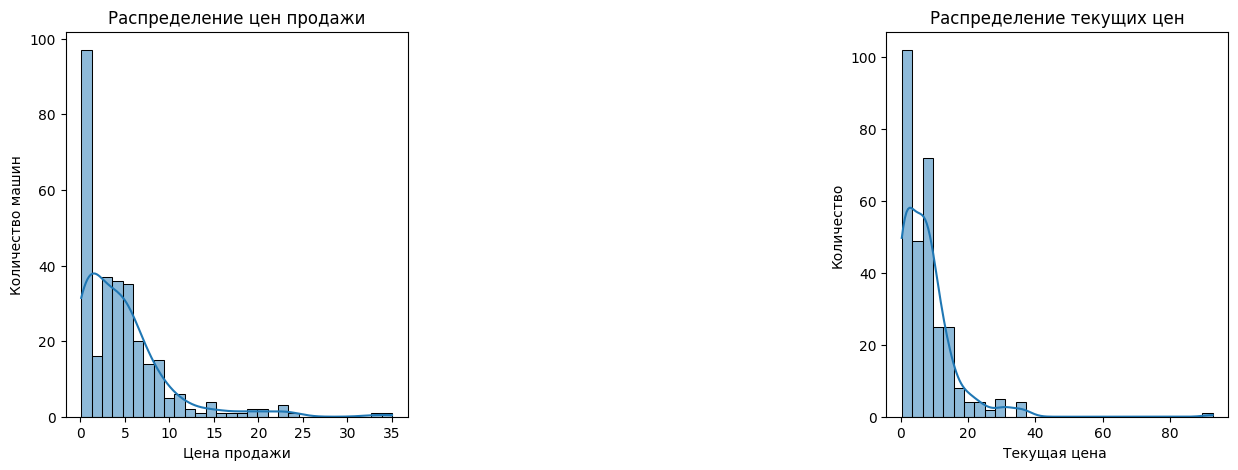

In [26]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Selling_Price'], bins=30, kde=True)
plt.title('Распределение цен продажи')
plt.xlabel('Цена продажи')
plt.xlabel('Цена продажи')
plt.ylabel('Количество машин')

plt.subplot(1, 3, 3)
sns.histplot(df['Present_Price'], bins=30, kde=True)
plt.title('Распределение текущих цен')
plt.xlabel('Текущая цена ')
plt.ylabel('Количество')

Text(0, 0.5, 'Цена продажи ')

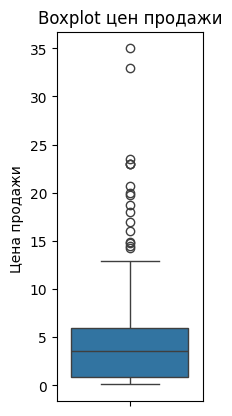

In [23]:
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Selling_Price'])
plt.title('Boxplot цен продажи')
plt.ylabel('Цена продажи ')